# temporal_signal_split 확인

[참고](https://ysg2997.tistory.com/42)

In [17]:
import torch
from torch_geometric_temporal.signal import temporal_signal_split

In [21]:
import matplotlib.pyplot as plt

In [83]:
import pandas as pd

In [91]:
from torch_geometric_temporal.dataset import WikiMathsDatasetLoader

dataset = WikiMathsDatasetLoader().get_dataset()
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)

In [92]:
dataset.snapshot_count

723

In [93]:
train_dataset.snapshot_count

578

In [94]:
test_dataset.snapshot_count

145

In [95]:
dataset.features[0].shape

(1068, 8)

In [96]:
train_dataset.features[0].shape

(1068, 8)

In [97]:
test_dataset.features[0].shape

(1068, 8)

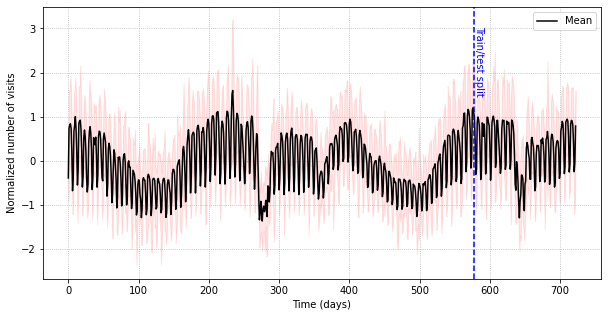

In [101]:
mean_cases = [snapshot.y.mean().item() for snapshot in dataset]
std_cases = [snapshot.y.std().item() for snapshot in dataset]
df = pd.DataFrame(mean_cases, columns=['mean'])
df['std'] = pd.DataFrame(std_cases, columns=['std'])

plt.figure(figsize=(10,5))
plt.plot(df['mean'], 'k-', label='Mean')
plt.grid(linestyle=':')
plt.fill_between(df.index, df['mean']-df['std'], df['mean']+df['std'], color='r', alpha=0.1)
plt.axvline(x=578, color='b', linestyle='--')
plt.text(578, 1.5, 'Train/test split', rotation=-90, color='b')
plt.xlabel('Time (days)')
plt.ylabel('Normalized number of visits')
plt.legend(loc='upper right')

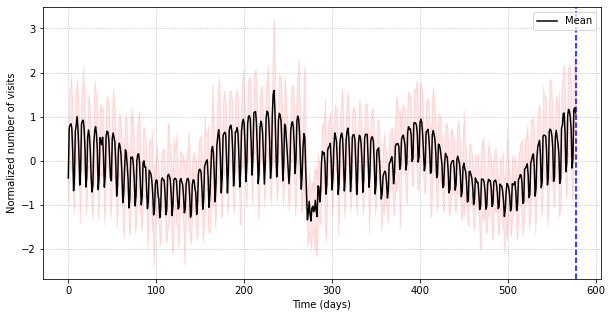

In [104]:
mean_cases = [snapshot.y.mean().item() for snapshot in train_dataset]
std_cases = [snapshot.y.std().item() for snapshot in train_dataset]
df = pd.DataFrame(mean_cases, columns=['mean'])
df['std'] = pd.DataFrame(std_cases, columns=['std'])
plt.figure(figsize=(10,5))
plt.plot(df['mean'], 'k-', label='Mean')
plt.grid(linestyle=':')
plt.fill_between(df.index, df['mean']-df['std'], df['mean']+df['std'], color='r', alpha=0.1)
plt.axvline(x=578, color='b', linestyle='--')
# plt.text(360, 1.5, 'Train/test split', rotation=-90, color='b')
plt.xlabel('Time (days)')
plt.ylabel('Normalized number of visits')
plt.legend(loc='upper right')

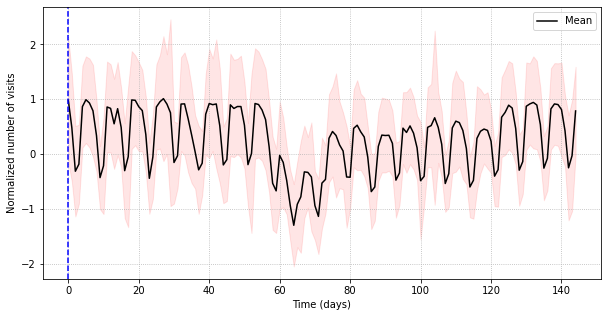

In [105]:
mean_cases = [snapshot.y.mean().item() for snapshot in test_dataset]
std_cases = [snapshot.y.std().item() for snapshot in test_dataset]
df = pd.DataFrame(mean_cases, columns=['mean'])
df['std'] = pd.DataFrame(std_cases, columns=['std'])

plt.figure(figsize=(10,5))
plt.plot(df['mean'], 'k-', label='Mean')
plt.grid(linestyle=':')
plt.fill_between(df.index, df['mean']-df['std'], df['mean']+df['std'], color='r', alpha=0.1)
plt.axvline(x=0, color='b', linestyle='--')
# plt.text(360, 1.5, 'Train/test split', rotation=-90, color='b')
plt.xlabel('Time (days)')
plt.ylabel('Normalized number of visits')
plt.legend(loc='upper right')